<br><br><br>

## Load a colormap

<br>

All default values:

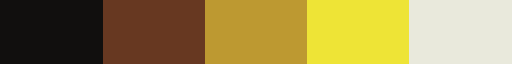

In [1]:
from pypalettes import load_cmap

cmap = load_cmap('Acanthurus_triostegus')
cmap

<br>

Get a continuous version of a palette with `type='continuous'` (default is `'discrete'`):

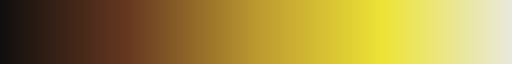

In [2]:
from pypalettes import load_cmap

cmap = load_cmap('Acanthurus_triostegus', type='continuous')
cmap

<br>

Reverse the order of a colormap with `reverse=True`:

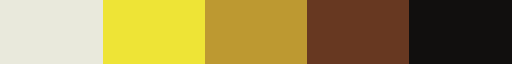

In [3]:
from pypalettes import load_cmap

cmap = load_cmap('Acanthurus_triostegus', reverse=True)
cmap

<br>

Combine `reverse` and `type` arguments:

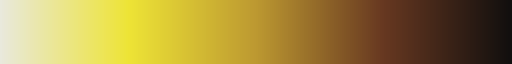

In [4]:
from pypalettes import load_cmap

cmap = load_cmap('Acanthurus_triostegus', reverse=True, type='continuous')
cmap

<br>

Keep only specific colors from a palette with the `keep` argument:

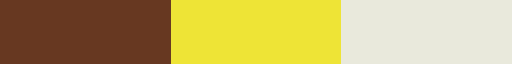

In [5]:
from pypalettes import load_cmap

cmap = load_cmap('Acanthurus_triostegus', keep=[False, True, False, True, True])
cmap

<br>

Keep only the first colors of a palette with `keep_first_n`:

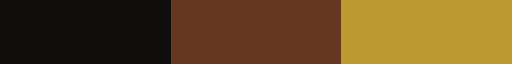

In [6]:
from pypalettes import load_cmap

cmap = load_cmap('Acanthurus_triostegus', keep_first_n=3)
cmap

<br>

Load a random palette:

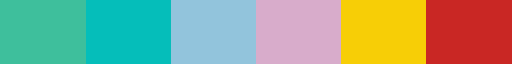

In [7]:
from pypalettes import load_cmap

cmap = load_cmap()
cmap

<br><br><br>

## Use a color map in practice

<br>

For concrete examples, check [those charts made with pypalettes](https://github.com/JosephBARBIERDARNAL/pypalettes/blob/main/README.md#chart-made-with-pypalettes).

For a better understanding of how to use a colormap in practice, read below.

<br>

### Discrete palettes

When loading a discrete palette, it looks like this:

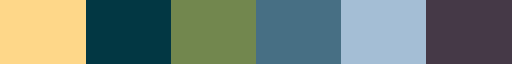

In [8]:
from pypalettes import load_cmap

cmap = load_cmap("Acadia")
cmap

In this case, `cmap` is actually a function that can be used to retrieve elements. For example:

- `cmap(0)` gives us the first color (RGB format) of the palette
- `cmap(1)` gives us the second one
- and so on

In [9]:
print(cmap(0))
print(cmap(1))

(0.996078431372549, 0.8431372549019608, 0.5372549019607843, 1.0)
(0.00784313725490196, 0.21568627450980393, 0.2627450980392157, 1.0)


What if we try `cmap(10)` for a palette of only 7 colors like in our case? It returns the last color in the palette:

In [10]:
from pypalettes import load_cmap

cmap = load_cmap("Acadia")

print(f'First color (rgba): {cmap(0)}')
print(f'Second color (rgba): {cmap(1)}')
print(f'Third color (rgba): {cmap(2)}')
print(f'Fourth color (rgba): {cmap(3)}')  
print(f'Fifth color (rgba): {cmap(4)}')
print(f'Sixth color (rgba): {cmap(5)}')
print(f'Seventh color (rgba): {cmap(6)}')
print(f'Eighth color (rgba): {cmap(7)}\n')
      
print(f'cmap(6) == cmap(7): {cmap(6) == cmap(7)}')

First color (rgba): (0.996078431372549, 0.8431372549019608, 0.5372549019607843, 1.0)
Second color (rgba): (0.00784313725490196, 0.21568627450980393, 0.2627450980392157, 1.0)
Third color (rgba): (0.4470588235294118, 0.5294117647058824, 0.3058823529411765, 1.0)
Fourth color (rgba): (0.2784313725490196, 0.43529411764705883, 0.5176470588235295, 1.0)
Fifth color (rgba): (0.6431372549019608, 0.7450980392156863, 0.8352941176470589, 1.0)
Sixth color (rgba): (0.27058823529411763, 0.2235294117647059, 0.2784313725490196, 1.0)
Seventh color (rgba): (0.27058823529411763, 0.2235294117647059, 0.2784313725490196, 1.0)
Eighth color (rgba): (0.27058823529411763, 0.2235294117647059, 0.2784313725490196, 1.0)

cmap(6) == cmap(7): True


Ok now let's see we use for a **real chart**. We will create the now famous iris scatter plot, with colors from [pypalettes](https://python-graph-gallery.com/color-palette-finder/).

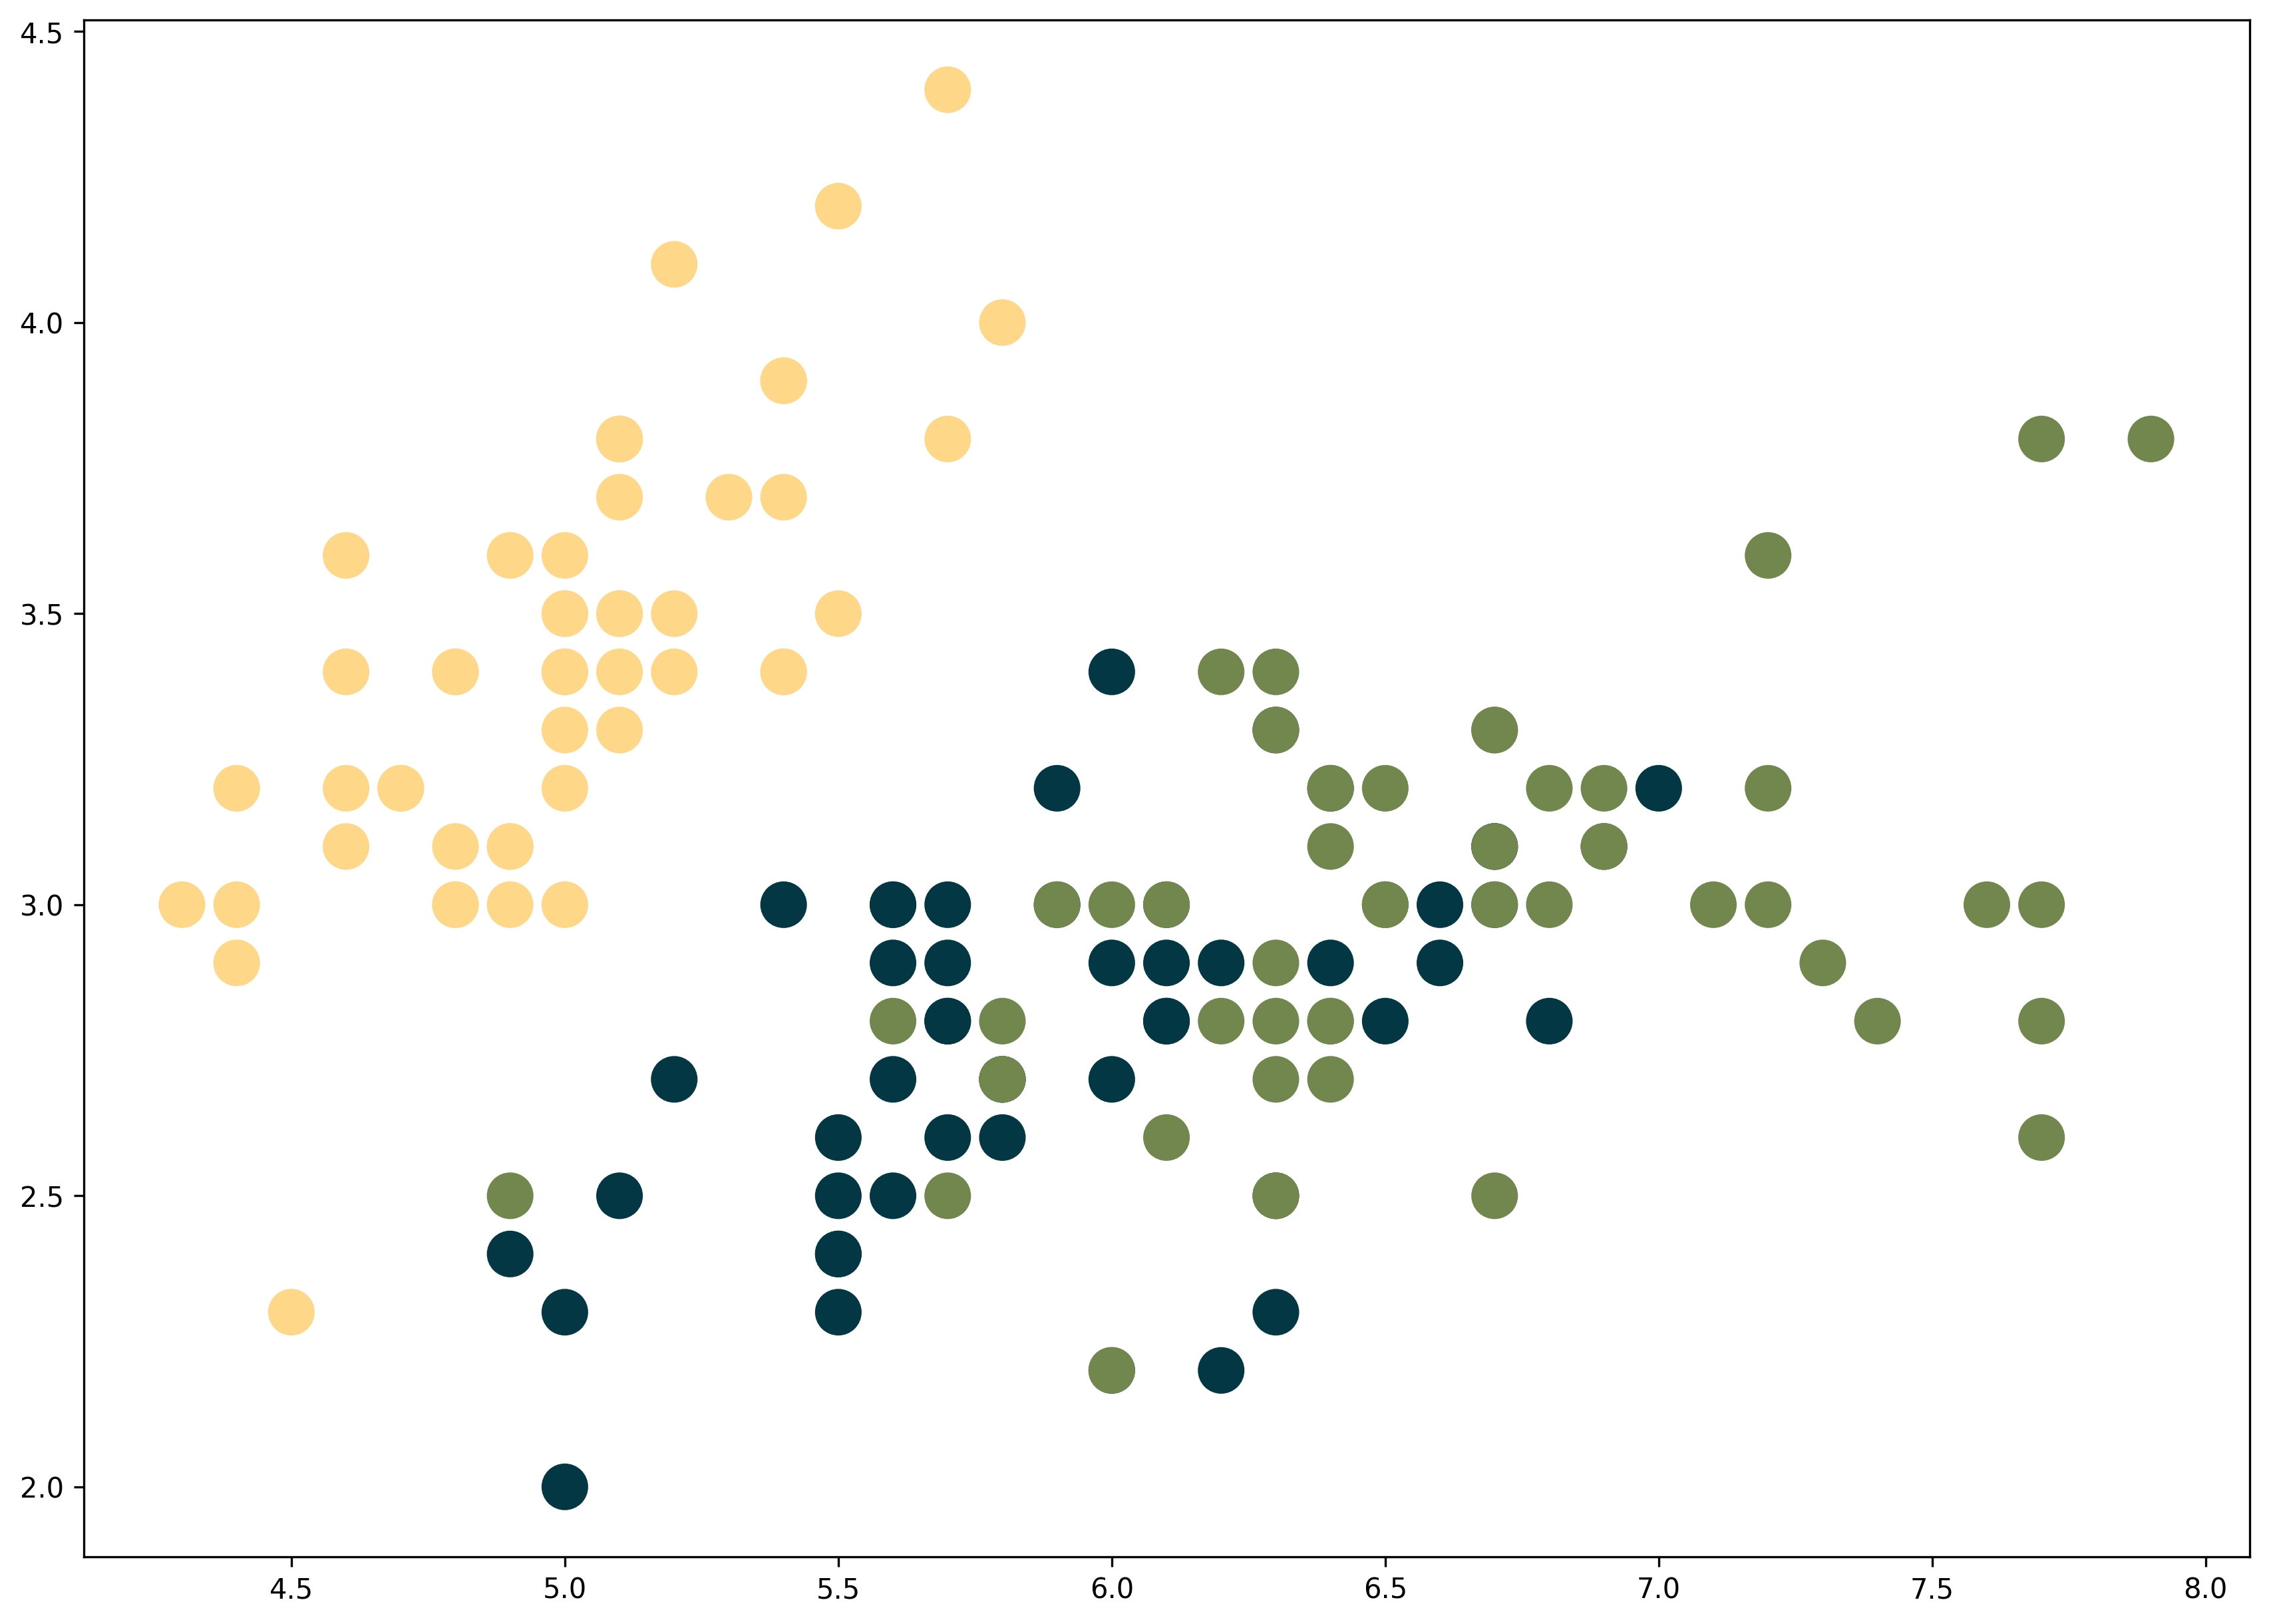

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from pypalettes import load_cmap

# load the color map
cmap = load_cmap("Acadia", keep_first_n=3)

# load the dataset
df = sns.load_dataset('iris')

# the column that we want to map with colors must be a `category`
df['species'] = df['species'].astype("category")

# create the chart
fig, ax = plt.subplots(figsize=(14, 10), dpi=300)
ax.scatter(
   x=df['sepal_length'], y=df['sepal_width'],
   c=df['species'].cat.codes, cmap=cmap,
   s=250
)
plt.show()

<br>

### Continuous palettes

Continuous and discrete palettes are very similar but need to be used in different ways.

When loading a continuous palette, it looks like this:

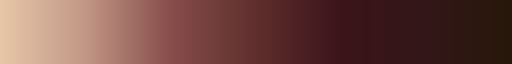

In [12]:
from pypalettes import load_cmap

cmap = load_cmap("Aurora", type='continuous')
cmap

The `cmap` object is still a function, but `cmap(0)` returns the first color of the palette and `cmap(1)` the last one (not totally exact, but it doesn't matter here).

*Note: this does not matter when using the `cmap` argument from matplotlib/seaborn and pass it directly the `cmap` from pypalettes.*

In [13]:
cmap(12)

(0.8649134948096886, 0.7272433679354094, 0.6211764705882353, 1.0)

Ok now let's see we use for a **real chart**. We will create a heatmap, with colors from [pypalettes](https://python-graph-gallery.com/color-palette-finder/).

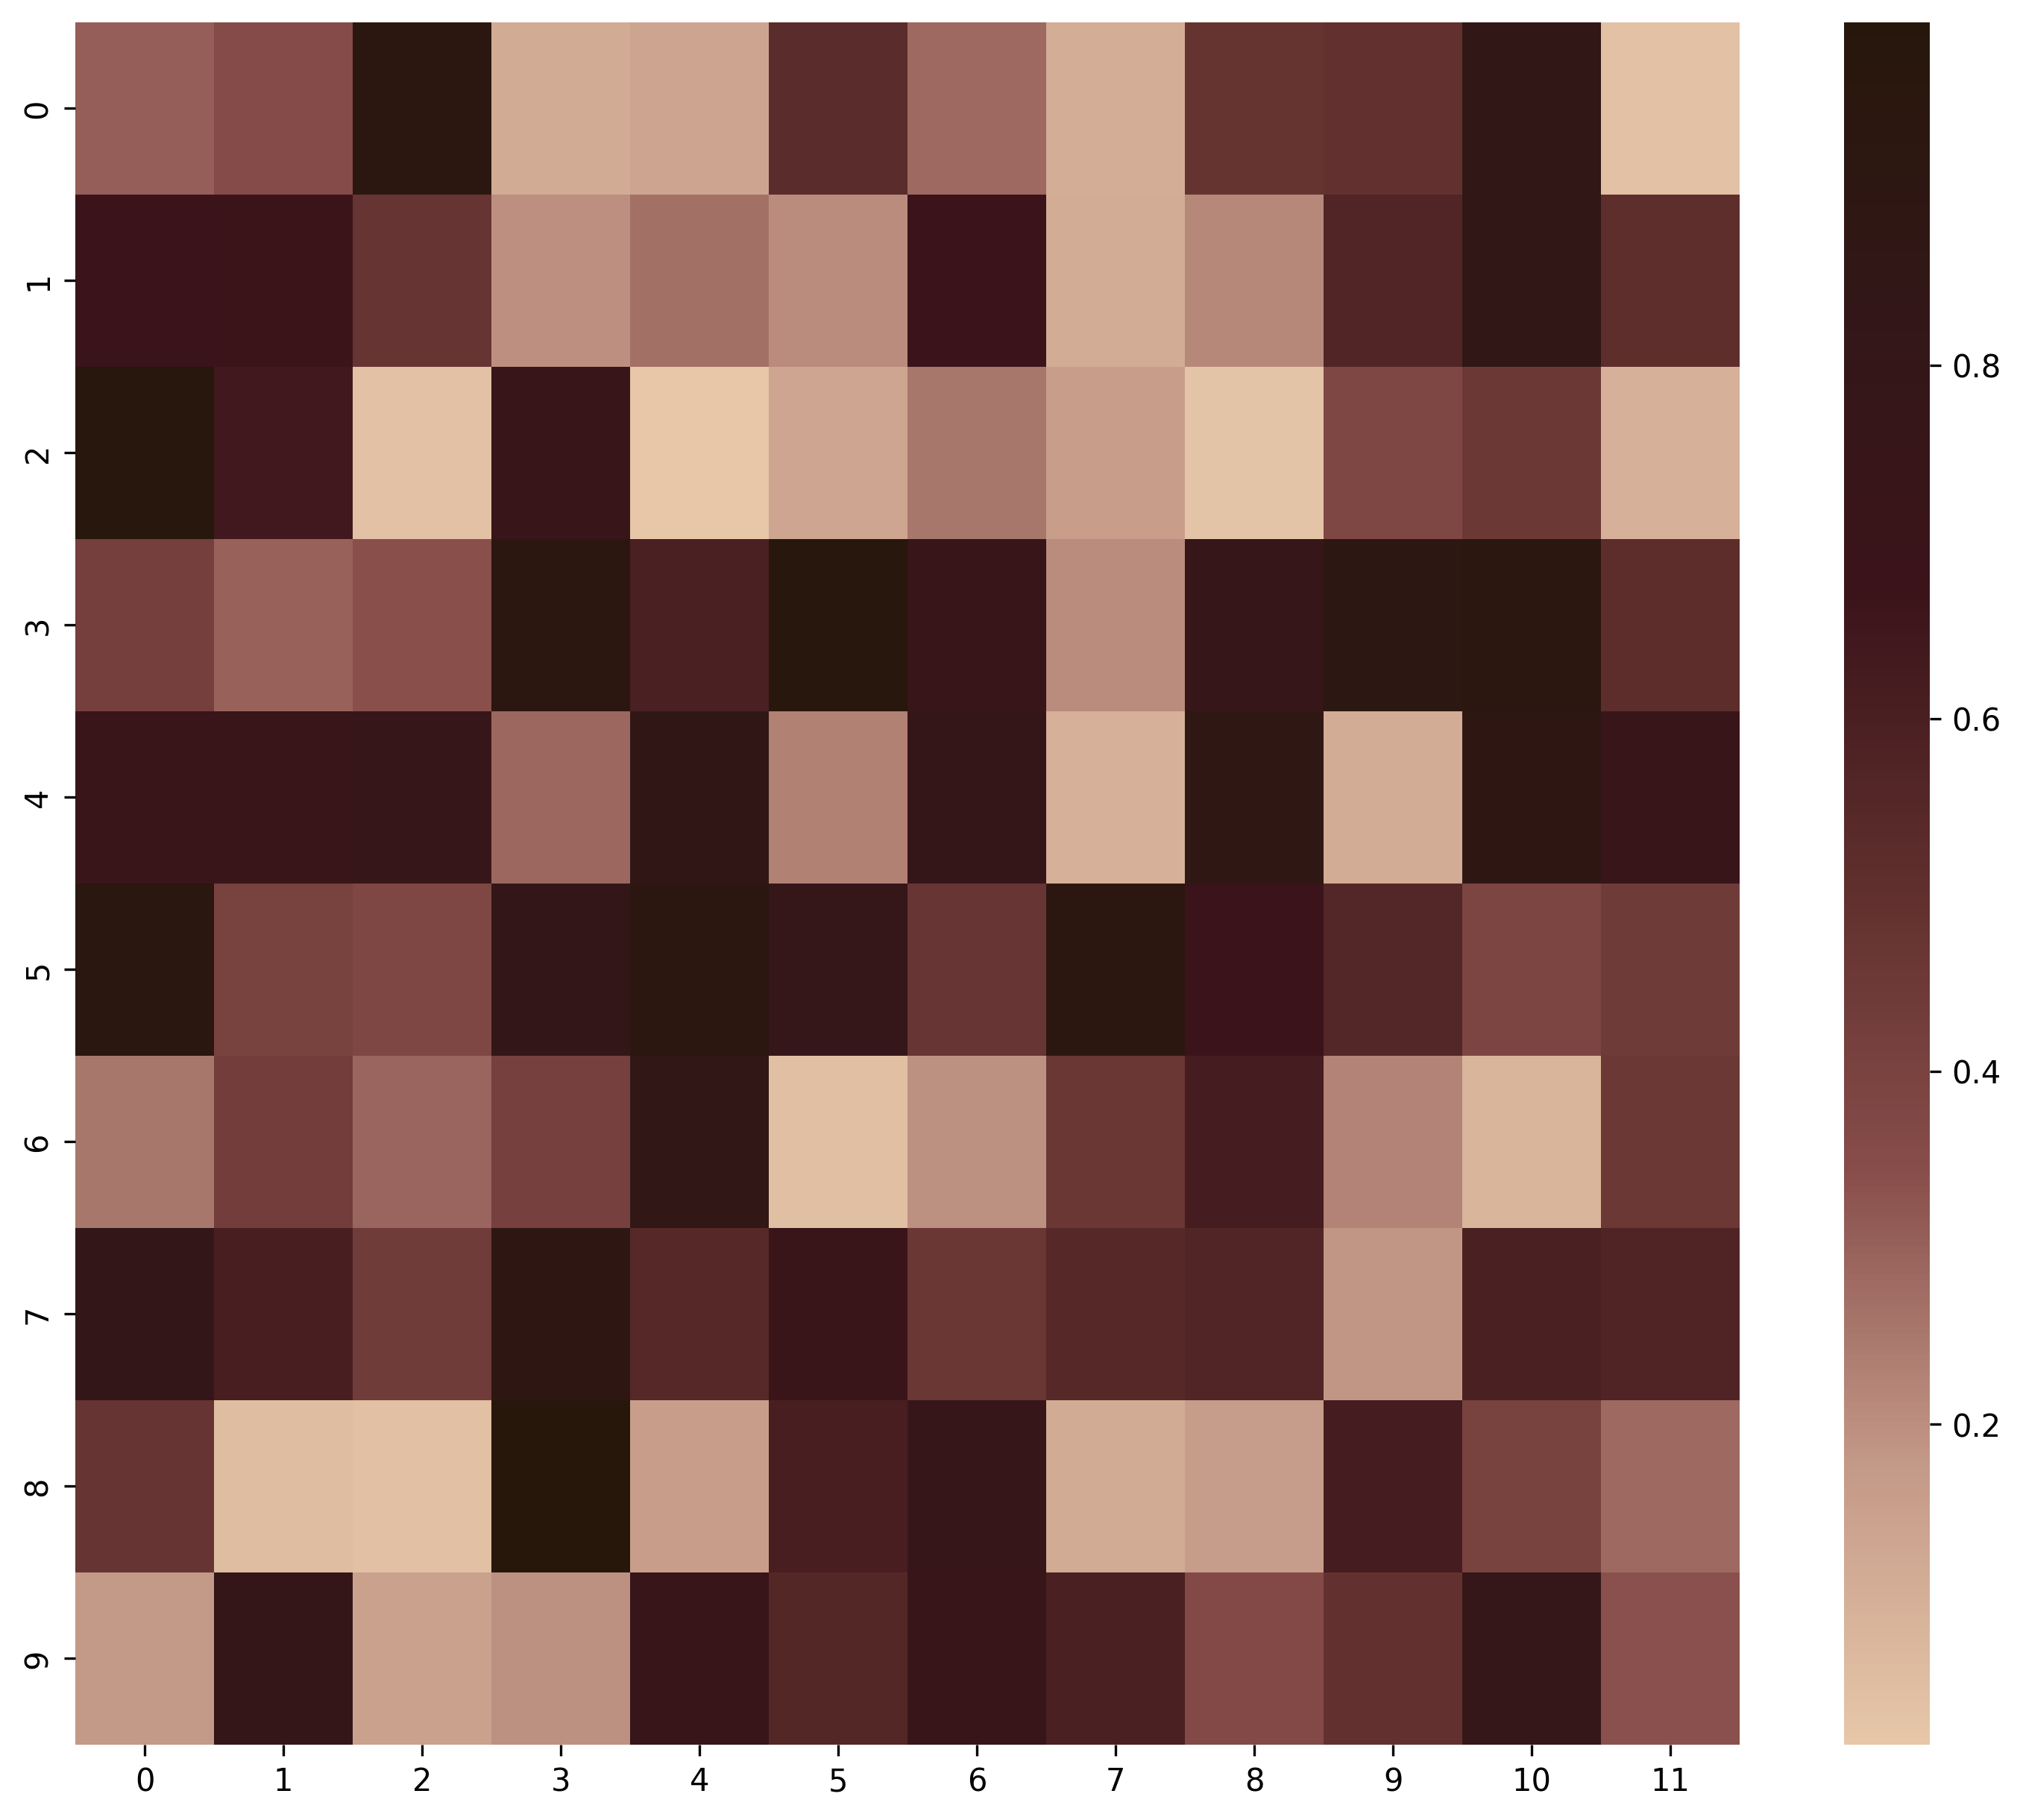

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from pypalettes import load_cmap
import numpy as np

# create a simple matrix
data = np.random.rand(10, 12)

# load the colormap
cmap = load_cmap('Aurora', type='continuous')

# create the chart
fig, ax = plt.subplots(figsize=(12, 10), dpi=300)
sns.heatmap(data, cmap=cmap, ax=ax)
plt.show()

<br><br><br>

## Get values and properties of colormaps

<br>

Since the returned object of the `load_cmap()` function is either [matplotlib.colors.LinearSegmentedColormap](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.LinearSegmentedColormap.html) or [matplotlib.colors.ListedColormap](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html) depending on the value of the `type` (`continuous` or `discrete`) argument, the cmap has some usefull attributes/methods:

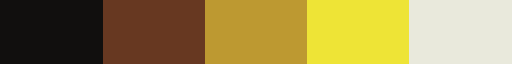

In [28]:
cmap = load_cmap('Acanthurus_triostegus')
cmap

In [16]:
cmap.colors # same result as using `get_hex(palette_name)`

['#110F0EFF', '#673821FF', '#BD9931FF', '#EEE436FF', '#E9E9DCFF']

In [17]:
cmap.name

'Acanthurus_triostegus'

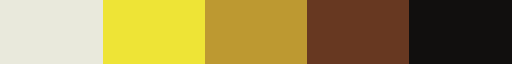

In [18]:
cmap.reversed() # save result as using `load_cmap(palette_name, reverse=True)`

<br><br><br>

### Broader usage

<br>

[pypalettes](https://python-graph-gallery.com/color-palette-finder/) also provides a few tools to retrieve palette properties, such as the `get_rgb()` and `get_hex()` functions.

These functions also accept the `reverse`, `keep` and `keep_first_n` arguments for more combinations.

In [31]:
from pypalettes import get_rgb

get_rgb('AirNomads')

[(255, 153, 51),
 (194, 72, 65),
 (255, 255, 51),
 (139, 91, 69),
 (135, 175, 209),
 (238, 176, 90),
 (219, 197, 160)]

In [29]:
from pypalettes import get_hex

get_hex('pupitar')

['#7098C0FF',
 '#88C0E8FF',
 '#285880FF',
 '#B8E0F8FF',
 '#F8F8F8FF',
 '#404060FF',
 '#A8A8A8FF',
 '#C8C8D0FF',
 '#B04000FF']

And finally, [pypalettes](https://python-graph-gallery.com/color-palette-finder/) also provides a way of acknowledging the authors of the palette with a `get_source()` function which indicates the original source.

In [20]:
from pypalettes import get_source
get_source('bilbao')

'The R package: {khroma}'

Bonus: a `get_kind()` function to find what is the type of palette. Either `qualitative` or `sequential`.

In [34]:
from pypalettes import get_kind
get_kind('pupitar')

'qualitative'

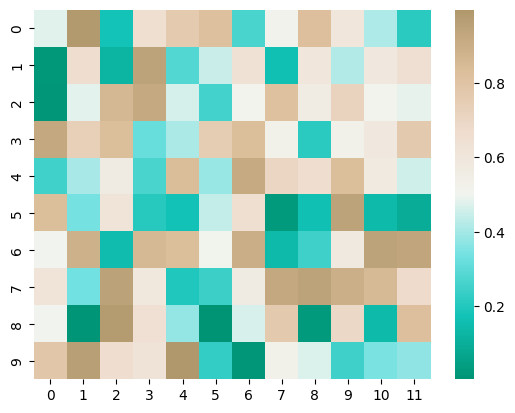

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from pypalettes import load_cmap
import numpy as np

data = np.random.rand(10, 12)

cmap = load_cmap('Anemone', type='continuous')

sns.heatmap(data, cmap=cmap)
plt.savefig('images/heatmap.png', dpi=300)
plt.show()